In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn import linear_model

# from sklearn.metrics import plot_confusion_matrix
from IPython.core.debugger import Pdb  # 念のため

In [2]:
def print_evaluate(x_train, y_test, y_pred, ave="macro"):
    print("accuracy = \t", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
    print(
        "precision = \t",
        metrics.precision_score(y_true=y_test, y_pred=y_pred, average=ave),
    )
    print(
        "recall = \t", metrics.recall_score(y_true=y_test, y_pred=y_pred, average=ave)
    )
    print("f1 score = \t", metrics.f1_score(y_true=y_test, y_pred=y_pred, average=ave))
    print(
        "confusion matrix = \n", metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
    )

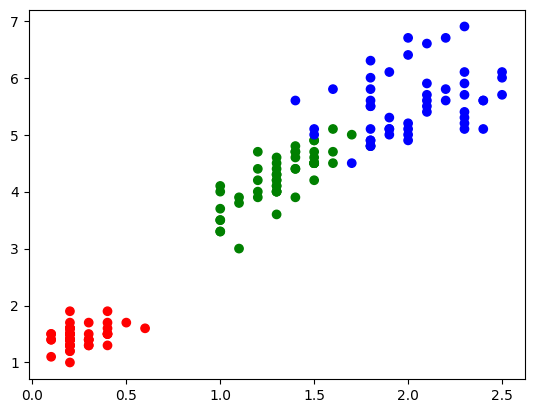

In [3]:
iris = load_iris()
feature_names = iris.feature_names
target_names = iris.target_names

df_iris = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]], columns=iris["feature_names"] + ["target"]
)

X = df_iris[
    ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
]
y = df_iris["target"]

x_train = np.array(df_iris[["petal width (cm)", "petal length (cm)"]])
# x_train = np.array(df_iris[['sepal length (cm)', 'sepal width (cm)']])
y_test = np.array(df_iris["target"])

color_codes = {0: "r", 1: "g", 2: "b"}
colors_pred = [color_codes[x] for x in y_test]
plt.scatter(x_train[:, 0], x_train[:, 1], c=colors_pred)

In [4]:
from sklearn.mixture import GaussianMixture

## Gaussian Mixture Model
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(x_train)

# fit()で収束したか確認
print(f"Convergence: {gm.converged_}")

y_pred = gm.predict(x_train)
y_pred = np.array(
    y_pred, dtype=np.float64
)  # Predict()の戻りの型がy_testと違うので一応合わせる。
y_pred_prob = gm.predict_proba(x_train)

# 精度評価結果
print_evaluate(x_train, y_test, y_pred, "macro")

# 共分散行列
print("Covariance matrix = \n", gm.covariances_)

Convergence: True
accuracy = 	 0.02
precision = 	 0.019230769230769232
recall = 	 0.02
f1 score = 	 0.0196078431372549
confusion matrix = 
 [[ 0 50  0]
 [ 1  0 49]
 [47  0  3]]
Covariance matrix = 
 [[[0.07200287 0.04402642]
  [0.04402642 0.30034404]]

 [[0.01088496 0.00594793]
  [0.00594793 0.02955684]]

 [[0.04585075 0.08489919]
  [0.08489919 0.24667113]]]


/var/folders/1w/52jfb36j6sg557p8z_gknglh0000gn/T/ipykernel_57381/3806668582.py:14: UserWarning: Log scale: values of z <= 0 have been masked
  cont = plt.contour(


<function matplotlib.pyplot.show(close=None, block=None)>

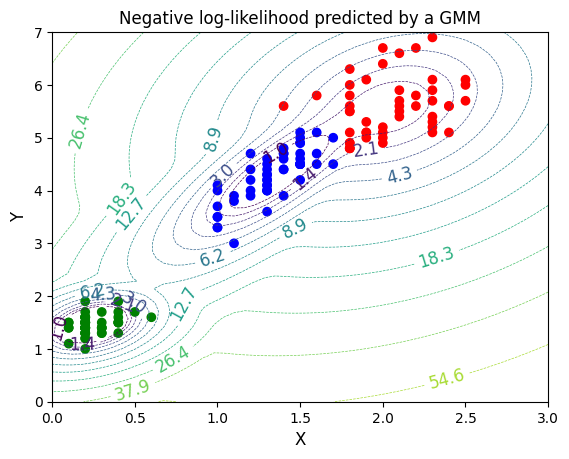

In [5]:
from matplotlib.colors import LogNorm


colors_pred = [color_codes[x] for x in y_pred]

# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py
x = np.linspace(0.0, 3.0)
y = np.linspace(0.0, 7.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gm.score_samples(XX)
Z = Z.reshape(X.shape)

cont = plt.contour(
    X,
    Y,
    Z,
    norm=LogNorm(vmin=1.0, vmax=100.0),
    levels=np.logspace(0, 3, 20),
    linestyles="dashed",
    linewidths=0.5,
)

cont.clabel(fmt="%1.1f", fontsize=12)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)

plt.title("Negative log-likelihood predicted by a GMM")
plt.scatter(x_train[:, 0], x_train[:, 1], c=colors_pred)
plt.show

Text(0.5, 0, 'n_components')

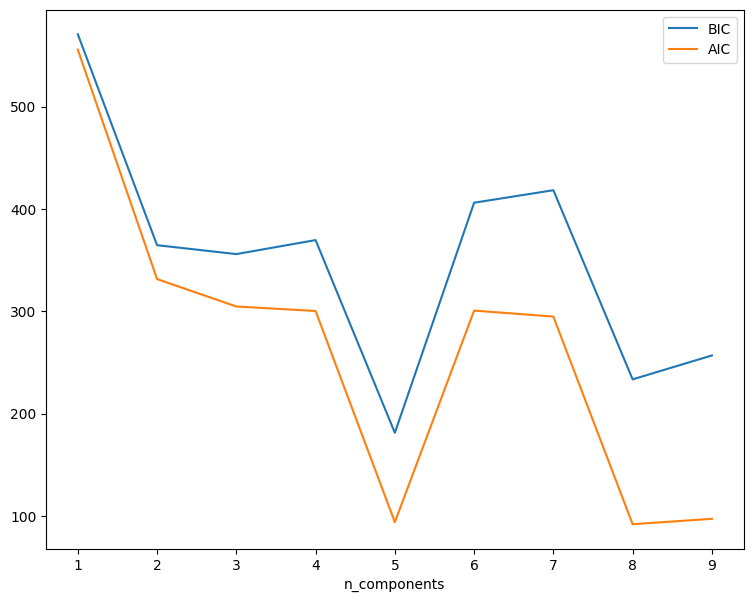

In [6]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, n_init=10).fit(x_train) for n in n_components]

fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(n_components, [m.bic(x_train) for m in models], label="BIC")
ax.plot(n_components, [m.aic(x_train) for m in models], label="AIC")

plt.legend(loc="best")
plt.xlabel("n_components")

Text(0.5, 0, 'n_components')

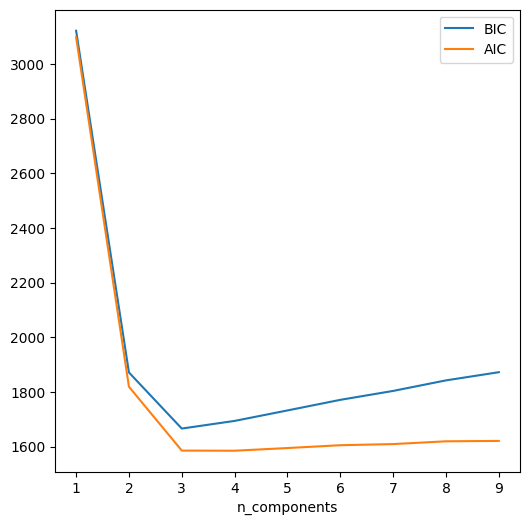

In [7]:
x_new, y_new = gm.sample(850)
x_new = np.array(x_new).reshape(850, 2)
y_new = np.array(y_new)
x_augment = np.vstack([x_train, x_new])
y_augment = np.append(y_test, y_new)

n_components = np.arange(1, 10)
models = [GaussianMixture(n, n_init=10).fit(x_augment) for n in n_components]

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(n_components, [m.bic(x_new) for m in models], label="BIC")
ax.plot(n_components, [m.aic(x_new) for m in models], label="AIC")

plt.legend(loc="best")
plt.xlabel("n_components")